<a href="https://colab.research.google.com/github/seojeongbin/web1/blob/master/%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 모델링


## 알고리즘 적용을 위한 데이터 준비 

### 데이터 호출 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
data = pd.read_csv("대회데이터.csv", encoding='cp949')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,5,6,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data.columns = data.iloc[0,:]
data = data.iloc[1:,:]
data = data.reset_index(drop = True)
data = data.reset_index(drop = False)

data

,index,작업번호,마킹길이,절단길이,철판두께,철판재질,절단갯수,작업장,절단장비,마킹시간,절단시간
0,0,1,46,21.9,30,DZB,1,23,PL233,194,827
1,1,2,33.9,111.8,12,A,46,23,PL233,324,2906
2,2,3,49.5,33.5,13,A,2,23,PL234,241,1003
3,3,4,75.7,174.9,13,A,35,23,PL233,483,4412
4,4,5,66.5,66.6,13,A,7,23,PL233,331,1601
...,...,...,...,...,...,...,...,...,...,...,...
162320,162320,162337,139.8,162,19,AH32,31,23,PL231,827,2899
162321,162321,162338,18.5,28.9,16,A,56,25,PL252,165,930
162322,162322,162339,63.7,25.6,15,AH32,1,26,PL261,345,696
162323,162323,162340,94.7,61.4,19,AH32,2,26,PL261,0,2155


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162325 entries, 0 to 162324
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   index   162325 non-null  int64 
 1   작업번호    162325 non-null  object
 2   마킹길이    162325 non-null  object
 3   절단길이    162325 non-null  object
 4   철판두께    162325 non-null  object
 5   철판재질    162325 non-null  object
 6   절단갯수    162325 non-null  object
 7   작업장     162325 non-null  object
 8   절단장비    162325 non-null  object
 9   마킹시간    162325 non-null  object
 10  절단시간    162325 non-null  object
dtypes: int64(1), object(10)
memory usage: 13.6+ MB


In [ ]:
del data['index']

In [ ]:
data.작업번호 = data.작업번호.astype(float)
data.마킹길이 = data.마킹길이.astype(float)
data.절단길이 = data.절단길이.astype(float)
data.절단갯수 = data.절단갯수.astype(float)
data.마킹시간 = data.마킹시간.astype(float)
data.절단시간 = data.절단시간.astype(float)
data.철판두께 = data.철판두께.astype(float)

### 데이터 전처리 

#### 아웃라이어 제거

In [ ]:
'''
from collections import Counter
def detect_outliers(df,features):
  outlier_indices = [] 
  for c in features:
    Q1 = np.percentile(df[c],25)
    Q3 = np.percentile(df[c],75)
    IQR = Q3 - Q1
    outlier_step = IQR * 1.5
    outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index #filtre
    outlier_indices.extend(outlier_list_col)
  outlier_indices = Counter(outlier_indices)
  multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2) 
  return multiple_outliers
  '''

'\nfrom collections import Counter\ndef detect_outliers(df,features):\n  outlier_indices = [] \n  for c in features:\n    Q1 = np.percentile(df[c],25)\n    Q3 = np.percentile(df[c],75)\n    IQR = Q3 - Q1\n    outlier_step = IQR * 1.5\n    outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index #filtre\n    outlier_indices.extend(outlier_list_col)\n  outlier_indices = Counter(outlier_indices)\n  multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2) \n  return multiple_outliers\n  '

> 위 코드로는 탐색이 지난번때부터 안됐어서 주석화 후, 유튜브에서 찾아서 다른걸로 해보았습니다. 

In [ ]:
datawithoutoutliers = data[np.abs(data["절단시간"] - data["절단시간"].mean()) <= (3*data["절단시간"].std())]
datawithoutoutliers = datawithoutoutliers[np.abs(datawithoutoutliers["마킹시간"] - datawithoutoutliers["마킹시간"].mean()) <= (3*datawithoutoutliers["마킹시간"].std())]

print(data.shape)
print(datawithoutoutliers.shape)

(162325, 10)
(160694, 10)


In [ ]:
data = datawithoutoutliers
data

,작업번호,마킹길이,절단길이,철판두께,철판재질,절단갯수,작업장,절단장비,마킹시간,절단시간
0,1.0,46.0,21.9,30.0,DZB,1.0,23,PL233,194.0,827.0
1,2.0,33.9,111.8,12.0,A,46.0,23,PL233,324.0,2906.0
2,3.0,49.5,33.5,13.0,A,2.0,23,PL234,241.0,1003.0
3,4.0,75.7,174.9,13.0,A,35.0,23,PL233,483.0,4412.0
4,5.0,66.5,66.6,13.0,A,7.0,23,PL233,331.0,1601.0
...,...,...,...,...,...,...,...,...,...,...
162320,162337.0,139.8,162.0,19.0,AH32,31.0,23,PL231,827.0,2899.0
162321,162338.0,18.5,28.9,16.0,A,56.0,25,PL252,165.0,930.0
162322,162339.0,63.7,25.6,15.0,AH32,1.0,26,PL261,345.0,696.0
162323,162340.0,94.7,61.4,19.0,AH32,2.0,26,PL261,0.0,2155.0


In [ ]:
data['작업장'].unique()

array(['23', '22', '27', '26', '25', '21', '96', '97', '92', '91', '24',
       '14', 27, 91, 26, 25, 92, 24, 97, 96, 22, 23, 21, 14], dtype=object)

#### 마킹시간, 절단시간 -> 0 값 제거
* 산하형 말씀대로 해당값들이 0인 경우를 제거해보았습니다.
* 다른값으로 대체를 하든 아예 전부 삭제를 하든 0인 값들을 살려주지 않고 조치해주는 것이 좋은 생각이였던 것 같습니다. 

In [ ]:
markingtime = (data['마킹시간'] != 0)
cuttingtime = (data['절단시간'] != 0)

data = data.loc[markingtime & cuttingtime, :]

> 현부형 알려주신 방법 활용해보았습니다. 정말 좋은 것 같습니다 ~

In [ ]:
data

,작업번호,마킹길이,절단길이,철판두께,철판재질,절단갯수,작업장,절단장비,마킹시간,절단시간
0,1.0,46.0,21.9,30.0,DZB,1.0,23,PL233,194.0,827.0
1,2.0,33.9,111.8,12.0,A,46.0,23,PL233,324.0,2906.0
2,3.0,49.5,33.5,13.0,A,2.0,23,PL234,241.0,1003.0
3,4.0,75.7,174.9,13.0,A,35.0,23,PL233,483.0,4412.0
4,5.0,66.5,66.6,13.0,A,7.0,23,PL233,331.0,1601.0
...,...,...,...,...,...,...,...,...,...,...
162319,162336.0,75.2,124.0,16.0,AH32,33.0,23,PL234,464.0,3077.0
162320,162337.0,139.8,162.0,19.0,AH32,31.0,23,PL231,827.0,2899.0
162321,162338.0,18.5,28.9,16.0,A,56.0,25,PL252,165.0,930.0
162322,162339.0,63.7,25.6,15.0,AH32,1.0,26,PL261,345.0,696.0


#### 전처리를 마친 전체 df의 상관정도 

In [ ]:
data.corr(method = 'pearson')

,작업번호,마킹길이,절단길이,철판두께,절단갯수,마킹시간,절단시간
0,,,,,,,
작업번호,1.000000,0.036450,0.011071,-0.026132,-0.002107,0.017514,0.003625
마킹길이,0.036450,1.000000,0.073936,0.042371,-0.170775,0.389027,0.065831
절단길이,0.011071,0.073936,1.000000,-0.261160,0.653767,0.200778,0.890866
철판두께,-0.026132,0.042371,-0.261160,1.000000,-0.300523,-0.050706,-0.034957
절단갯수,-0.002107,-0.170775,0.653767,-0.300523,1.000000,0.045467,0.586400
마킹시간,0.017514,0.389027,0.200778,-0.050706,0.045467,1.000000,0.252896
절단시간,0.003625,0.065831,0.890866,-0.034957,0.586400,0.252896,1.000000


In [ ]:
!sudo apt-get install -y fonts-nanum

!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


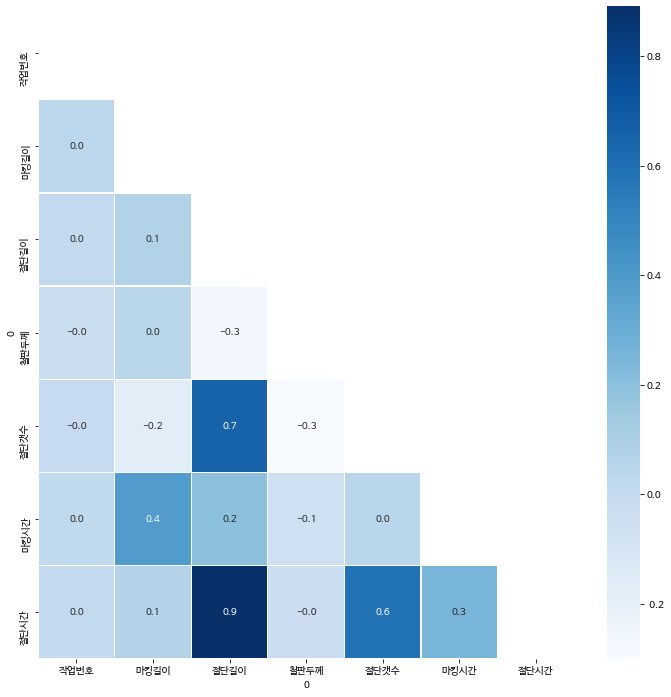

In [ ]:
f, ax = plt.subplots(figsize=(12,12))
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr(), annot=True, linewidths=0.4, linecolor='white', fmt='.1f', ax=ax, cmap='Blues', mask=mask)
plt.show()

#### 범주형 데이터 인코딩 

In [ ]:
onehot = pd.get_dummies(data, columns = ['철판재질','작업장','절단장비'])
data_strange = pd.concat([data, onehot], axis=1)
data_strange.head() #

,작업번호,마킹길이,절단길이,철판두께,철판재질,절단갯수,작업장,절단장비,마킹시간,절단시간,작업번호,마킹길이,절단길이,철판두께,절단갯수,마킹시간,절단시간,철판재질_32M60C,철판재질_9NI,철판재질_A,철판재질_AA,철판재질_AAH32,철판재질_AAH32-TM,철판재질_AAH36,철판재질_AE,철판재질_AEH32-TM,철판재질_AH32,철판재질_AH32-TM,철판재질_AH32TL,철판재질_AH36,철판재질_AH36-TM,철판재질_AH36TL,철판재질_AH40-TM,철판재질_B,철판재질_BA,철판재질_BAH32,철판재질_BAH36,철판재질_BZ,철판재질_BZB,철판재질_D,...,작업장_21,작업장_22,작업장_23,작업장_24,작업장_25,작업장_26,작업장_27,작업장_91,작업장_92,작업장_96,작업장_97,절단장비_PL141,절단장비_PL142,절단장비_PL211,절단장비_PL212,절단장비_PL221,절단장비_PL223,절단장비_PL224,절단장비_PL231,절단장비_PL233,절단장비_PL234,절단장비_PL241,절단장비_PL242,절단장비_PL252,절단장비_PL253,절단장비_PL254,절단장비_PL261,절단장비_PL262,절단장비_PL271,절단장비_PL272,절단장비_PL273,절단장비_PL911,절단장비_PL921,절단장비_PL922,절단장비_PL961,절단장비_PL973,절단장비_PL974,절단장비_PS213,절단장비_PS243,절단장비_PS963
0,1.0,46.0,21.9,30.0,DZB,1.0,23,PL233,194.0,827.0,1.0,46.0,21.9,30.0,1.0,194.0,827.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2.0,33.9,111.8,12.0,A,46.0,23,PL233,324.0,2906.0,2.0,33.9,111.8,12.0,46.0,324.0,2906.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.0,49.5,33.5,13.0,A,2.0,23,PL234,241.0,1003.0,3.0,49.5,33.5,13.0,2.0,241.0,1003.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.0,75.7,174.9,13.0,A,35.0,23,PL233,483.0,4412.0,4.0,75.7,174.9,13.0,35.0,483.0,4412.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5.0,66.5,66.6,13.0,A,7.0,23,PL233,331.0,1601.0,5.0,66.5,66.6,13.0,7.0,331.0,1601.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


> 작업번호, 마킹길이, 절단길이, 두께, 재질, 절단수 ,절단시간, 마킹시간 -> 왜 전부 두번씩?? 
* 현부형 코드를 이용했습니다..

In [ ]:
data_place = data.loc[:,'작업장'].str.get_dummies(sep=',')

In [ ]:
col = ['마킹길이', '절단길이', '철판두께', '절단갯수']
col_y = ['절단시간', '마킹시간']

onehot = pd.get_dummies(data, columns = ['철판재질','절단장비'])
onehot = onehot.iloc[:,9:]

In [ ]:
Data = pd.concat([data.loc[:, col], onehot, data_place, data.loc[:, col_y]], axis=1)
Data

,마킹길이,절단길이,철판두께,절단갯수,철판재질_9NI,철판재질_A,철판재질_AA,철판재질_AAH32,철판재질_AAH32-TM,철판재질_AAH36,철판재질_AE,철판재질_AEH32-TM,철판재질_AH32,철판재질_AH32-TM,철판재질_AH32TL,철판재질_AH36,철판재질_AH36-TM,철판재질_AH36TL,철판재질_AH40-TM,철판재질_B,철판재질_BA,철판재질_BAH32,철판재질_BAH36,철판재질_BZ,철판재질_BZB,철판재질_D,철판재질_D-TM,철판재질_DH32,철판재질_DH32-TM,철판재질_DH32TL,철판재질_DH36,철판재질_DH36-TM,철판재질_DH36TL,철판재질_DH40-TM,철판재질_DZB,철판재질_DZB-TM,철판재질_E,철판재질_E-TM,철판재질_EH32,철판재질_EH32-TM,...,절단장비_PL212,절단장비_PL221,절단장비_PL223,절단장비_PL224,절단장비_PL231,절단장비_PL233,절단장비_PL234,절단장비_PL241,절단장비_PL242,절단장비_PL252,절단장비_PL253,절단장비_PL254,절단장비_PL261,절단장비_PL262,절단장비_PL271,절단장비_PL272,절단장비_PL273,절단장비_PL911,절단장비_PL921,절단장비_PL922,절단장비_PL961,절단장비_PL973,절단장비_PL974,절단장비_PS213,절단장비_PS243,절단장비_PS963,14,21,22,23,24,25,26,27,91,92,96,97,절단시간,마킹시간
0,46.0,21.9,30.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,827.0,194.0
1,33.9,111.8,12.0,46.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2906.0,324.0
2,49.5,33.5,13.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1003.0,241.0
3,75.7,174.9,13.0,35.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4412.0,483.0
4,66.5,66.6,13.0,7.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1601.0,331.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162319,75.2,124.0,16.0,33.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3077.0,464.0
162320,139.8,162.0,19.0,31.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2899.0,827.0
162321,18.5,28.9,16.0,56.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,930.0,165.0
162322,63.7,25.6,15.0,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,696.0,345.0


### 모델링을 위한 변수할당 

In [ ]:
# 마킹시간 예측
y1 = Data['마킹시간'].values
x1 = Data.drop(['절단시간','마킹시간'], axis=1) # 원하는 항목 지워서 x 넣기
# 절단시간 예측
y2 = Data['절단시간'].values
x2 = Data.drop(['절단시간','마킹시간'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1,y1)
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2,y2)

In [ ]:
print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)

(116712, 121)
(38905, 121)
(116712,)


# 2. 스케줄링 

## 교수님 답변 

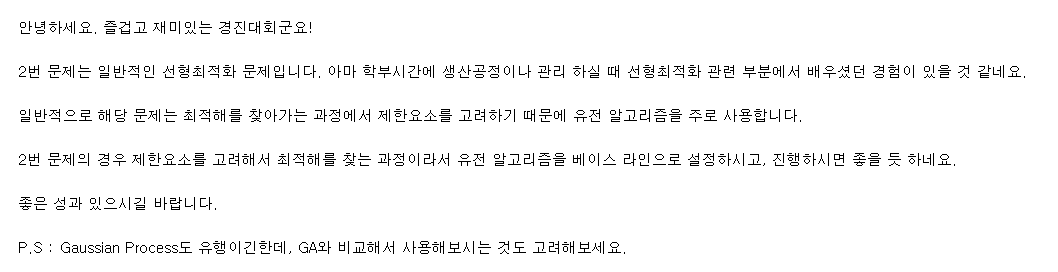

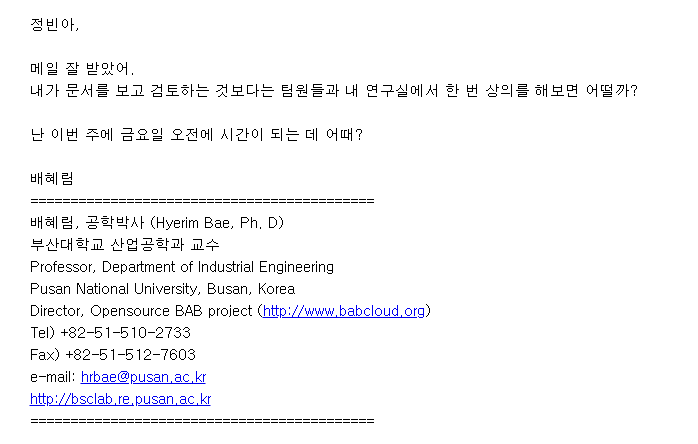

> * 혹시나 예의없어 보이진 않을까 정말 많이 고심해서 메일을 나름 잘 적어봤는데 두분 교수님 모두 정말정말 긍정적이게 답변을 주셨습니다.
* 한상곤 교수님께서는, 제한요소를 고려한 스케줄링 이란점에서 **'유전 알고리즘'**을 소개해주셨습니다.
* 배혜림 교수님께서는, 정말 감사하게도 직접 연구실에 찾아오게 해주셨습니다. 가서 2번문제뿐 아니라 **1번문제에 대해서도** 보여드리면서 검토를 받게된다면 정말 좋을 것 같습니다.

## 작업장과 절단장비가 어느정도 주어진 건 아닐까?

In [ ]:
data.작업장 = data.작업장.astype(float)
print(data['작업장'].unique())

[23. 22. 27. 26. 25. 21. 96. 97. 92. 91. 24. 14.]


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


### 작업장과 절단장비의 빈도분석 

In [ ]:
def bar_plot(x): 
  var = data[x]
  var_value = var.value_counts()
  plt.figure(figsize=(50,10))
  plt.bar(var_value.index, var_value)
  plt.xticks(var_value.index, var_value.index.values)
  plt.ylabel("빈도")
  plt.title(x)
  plt.show()

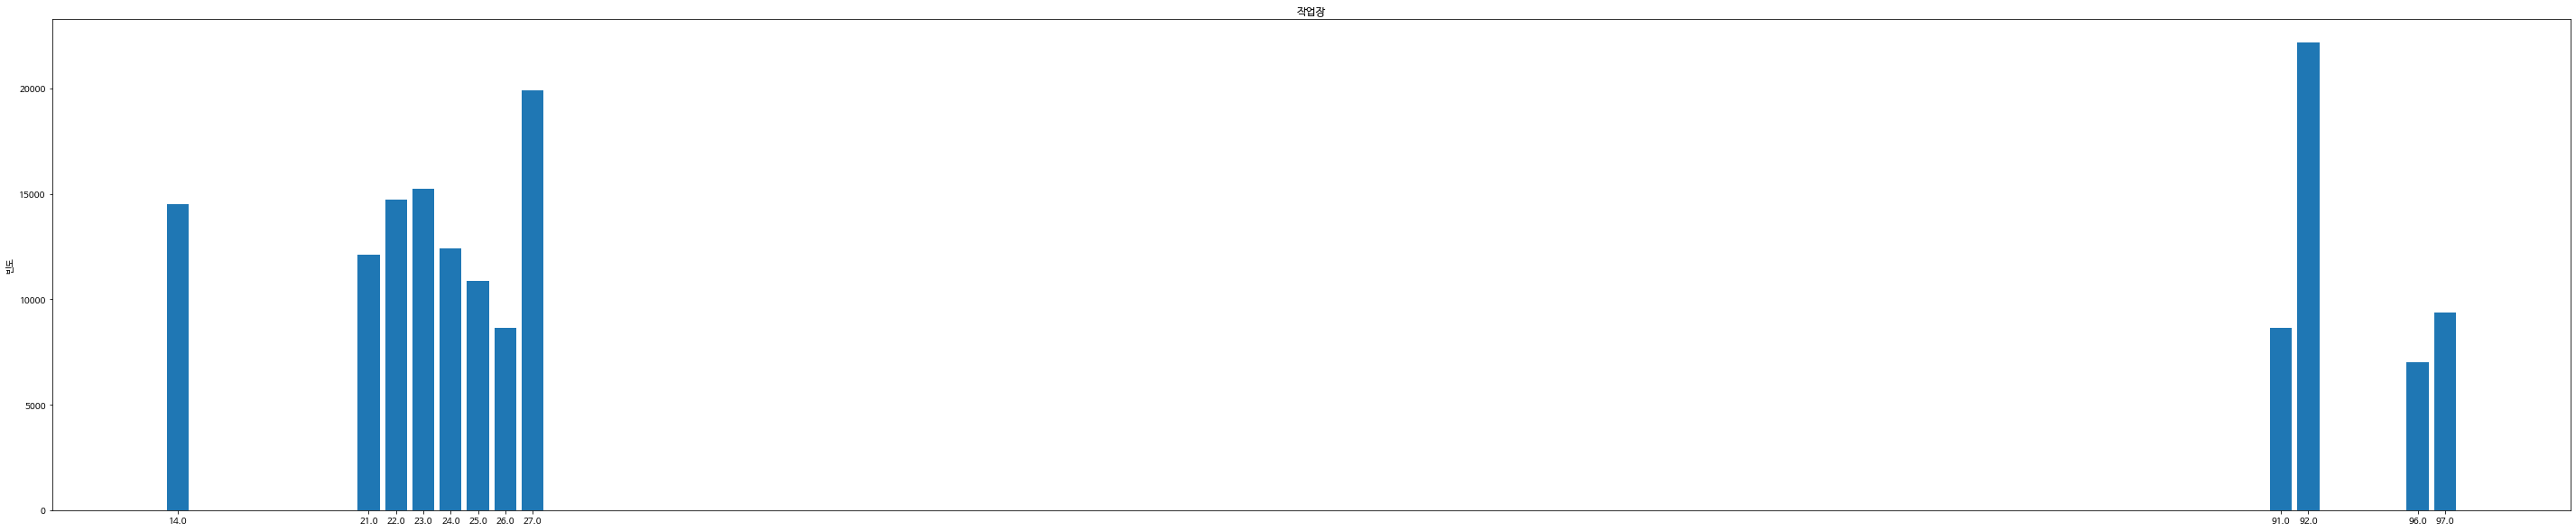

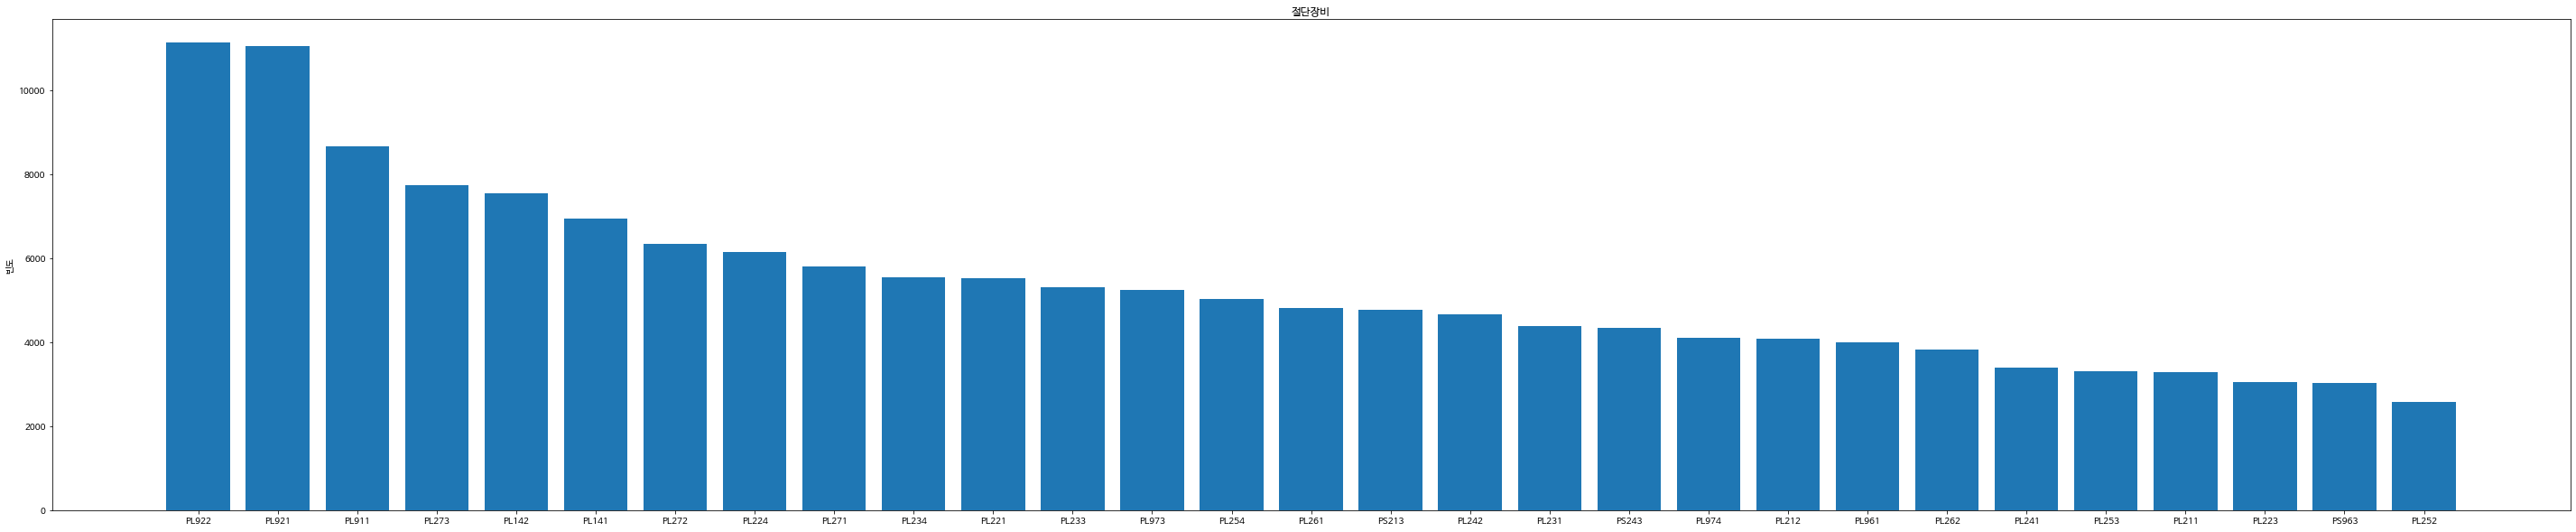

In [ ]:
category = ["작업장", "절단장비"] 
for c in category:
  bar_plot(c) # 그림 클릭하면 확대가 된다.

### 연관관계 파악 

In [ ]:
pd.set_option('display.max_rows', 100)

workplace = (data['작업장'] == 14)
data14 = data.loc[workplace, '절단장비']
print(data14)

286       PL142
287       PL141
516       PL141
517       PL141
518       PL142
          ...  
162274    PL142
162275    PL142
162276    PL142
162300    PL142
162301    PL142
Name: 절단장비, Length: 14500, dtype: object


In [ ]:
workplace = (data['작업장'] == 21)
data21 = data.loc[workplace, '절단장비']
print(data21)

59        PL212
60        PS213
61        PL212
62        PS213
63        PL212
          ...  
162149    PS213
162150    PS213
162151    PS213
162251    PL212
162302    PS213
Name: 절단장비, Length: 12131, dtype: object


In [ ]:
workplace = (data['작업장'] == 96)
data96 = data.loc[workplace, '절단장비']
print(data96)

98        PS963
99        PS963
100       PS963
102       PS963
105       PS963
          ...  
162214    PL961
162217    PL961
162252    PL961
162254    PL961
162305    PL961
Name: 절단장비, Length: 7022, dtype: object


In [ ]:
workplace = (data['작업장'] == 97)
data97 = data.loc[workplace, '절단장비']
print(data97)

101       PL974
103       PL973
104       PL973
106       PL973
107       PL973
          ...  
162257    PL973
162306    PL973
162307    PL973
162308    PL974
162309    PL974
Name: 절단장비, Length: 9364, dtype: object


In [ ]:


cutter_dict = {'14작업장 :' : '141, 142',
'21작업장 :' : '211, 212, 213(ps)',
'22작업장 :' : '221, 223, 224',
'23작업장 :' : '231, 233, 234',
'24작업장 :' : '241, 242, 243(ps)',
'25작업장 :' : '252, 253, 254',
'26작업장 :' : '261, 262',
'27작업장 :' : '271, 272, 273', 
'91작업장 :' : '911',
'92작업장 :' : '921, 922',
'96작업장 :' : '961, 963(ps)',
'97작업장 :' : '973, 974'}

cutter = pd.Series(cutter_dict)

summary = pd.DataFrame({'사용된 절단장비 종류':cutter})

print(summary)

               사용된 절단장비 종류
14작업장 :           141, 142
21작업장 :  211, 212, 213(ps)
22작업장 :      221, 223, 224
23작업장 :      231, 233, 234
24작업장 :  241, 242, 243(ps)
25작업장 :      252, 253, 254
26작업장 :           261, 262
27작업장 :      271, 272, 273
91작업장 :                911
92작업장 :           921, 922
96작업장 :       961, 963(ps)
97작업장 :           973, 974


> * **절단장비의 앞 두자리가 작업장 명칭에 따라가는 것을** 알수있었습니다.
* 대부분 PL로 시작하는 장비가 사용되었지만, **213번 243번 963번에 한해서는 PS**로 시작되었습니다
* 작업장 별로 사용되는 절단장비의 종류의 수가 일정하진 않았습니다. 

### 왜 특정3가지 장비만 PS로 시작할까?
* 혹시 특정상황에 있어서 PS로 시작하는 장비가 가용되는 것은 아닐까, 하는 의문을 갖고 편상관분석을 진행해보았습니다.

In [ ]:
# 전처리를 마친 전체데이터의 상관정도
col = ['마킹길이','절단길이','철판두께','절단갯수','마킹시간','절단시간']
total_data = data.loc[:,col]
total_data.corr(method = 'pearson')

,마킹길이,절단길이,철판두께,절단갯수,마킹시간,절단시간
0,,,,,,
마킹길이,1.000000,0.073936,0.042371,-0.170775,0.389027,0.065831
절단길이,0.073936,1.000000,-0.261160,0.653767,0.200778,0.890866
철판두께,0.042371,-0.261160,1.000000,-0.300523,-0.050706,-0.034957
절단갯수,-0.170775,0.653767,-0.300523,1.000000,0.045467,0.586400
마킹시간,0.389027,0.200778,-0.050706,0.045467,1.000000,0.252896
절단시간,0.065831,0.890866,-0.034957,0.586400,0.252896,1.000000


#### 213번 절단장비를 사용한경우 

In [ ]:
row = (data['절단장비'] == 'PS213')
col = ['마킹길이','절단길이','철판두께','절단갯수','마킹시간','절단시간']
data213 = data.loc[row, col]
data213.corr(method='pearson')

,마킹길이,절단길이,철판두께,절단갯수,마킹시간,절단시간
0,,,,,,
마킹길이,1.000000,0.124847,0.009500,-0.128991,0.589475,0.091594
절단길이,0.124847,1.000000,-0.235630,0.800025,0.404673,0.924568
철판두께,0.009500,-0.235630,1.000000,-0.243708,-0.067448,0.035154
절단갯수,-0.128991,0.800025,-0.243708,1.000000,0.176514,0.767347
마킹시간,0.589475,0.404673,-0.067448,0.176514,1.000000,0.374764
절단시간,0.091594,0.924568,0.035154,0.767347,0.374764,1.000000


#### 243번 절단장비를 사용한경우

In [ ]:
row = (data['절단장비'] == 'PS243')
col = ['마킹길이','절단길이','철판두께','절단갯수','마킹시간','절단시간']
data243 = data.loc[row, col]
data243.corr(method='pearson')

,마킹길이,절단길이,철판두께,절단갯수,마킹시간,절단시간
0,,,,,,
마킹길이,1.000000,0.146455,-0.122484,-0.110353,0.610457,0.083068
절단길이,0.146455,1.000000,-0.211478,0.809672,0.391029,0.883593
철판두께,-0.122484,-0.211478,1.000000,-0.154884,-0.151917,0.116294
절단갯수,-0.110353,0.809672,-0.154884,1.000000,0.146902,0.748567
마킹시간,0.610457,0.391029,-0.151917,0.146902,1.000000,0.330484
절단시간,0.083068,0.883593,0.116294,0.748567,0.330484,1.000000


#### 963번 절단장비를 사용한경우 

In [ ]:
row = (data['절단장비'] == 'PS963')
col = ['마킹길이','절단길이','철판두께','절단갯수','마킹시간','절단시간']
data963 = data.loc[row, col]
data963.corr(method='pearson')

,마킹길이,절단길이,철판두께,절단갯수,마킹시간,절단시간
0,,,,,,
마킹길이,1.000000,0.392824,-0.302910,0.091634,0.693506,0.284368
절단길이,0.392824,1.000000,-0.309907,0.788692,0.525974,0.886235
철판두께,-0.302910,-0.309907,1.000000,-0.278101,-0.220541,0.038046
절단갯수,0.091634,0.788692,-0.278101,1.000000,0.302651,0.695313
마킹시간,0.693506,0.525974,-0.220541,0.302651,1.000000,0.464501
절단시간,0.284368,0.886235,0.038046,0.695313,0.464501,1.000000


#### PS장비를 사용한경우 상관분석 시각화 

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


Text(0.5, 1.0, '\nPS963 절단장비를 이용한경우')

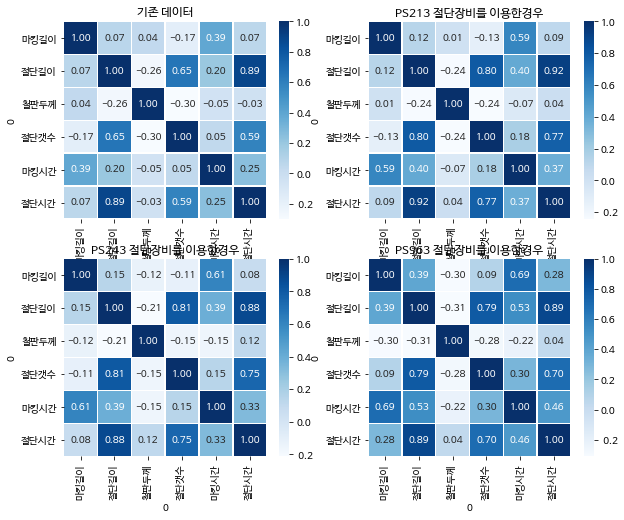

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns    
#plt.figure(figsize=(10,10))
'''sns.heatmap(data = total_data.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues',ax=ax1)'''


figure, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(10,8)


sns.heatmap(data = total_data.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues',ax=ax1)
ax1.set_title('기존 데이터')

sns.heatmap(data = data213.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues',ax=ax2)
ax2.set_title('PS213 절단장비를 이용한경우')

sns.heatmap(data = data243.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues',ax=ax3)
ax3.set_title('\nPS243 절단장비를 이용한경우')

sns.heatmap(data = data963.corr(), annot=True,
fmt = '.2f', linewidths=.5, cmap='Blues',ax=ax4)
ax4.set_title('\nPS963 절단장비를 이용한경우')

> * 타겟값 관련해서 거의 모든 지표에서 상관계수가 증가하였다.

### 사용상황을 추측해보자 

In [ ]:
print("원래 데이터\n",total_data.mean())
print("\nps213장비\n",data213.mean())
print("\nps243장비\n",data243.mean())
print("\nps963장비\n",data963.mean())

원래 데이터
 0
마킹길이      77.529313
절단길이      72.214468
철판두께      17.463244
절단갯수      13.009858
마킹시간     442.636203
절단시간    2092.968024
dtype: float64

ps213장비
 0
마킹길이      60.293705
절단길이      85.107700
철판두께      16.459736
절단갯수      17.879564
마킹시간     525.667646
절단시간    2484.359211
dtype: float64

ps243장비
 0
마킹길이      59.885905
절단길이      82.430219
철판두께      16.750980
절단갯수      16.903576
마킹시간     493.344637
절단시간    2451.882584
dtype: float64

ps963장비
 0
마킹길이      65.814276
절단길이      88.752357
철판두께      17.240389
절단갯수      17.442796
마킹시간     566.521925
절단시간    2561.276294
dtype: float64


> * ps장비를 쓰는경우는 (평균값만 보면) 마킹길이가 짧고, 절단길이가 긴경우에 한해서 쓰지 않을까 하고 추측이 되었다.

#### 특정값의 특정수치 초과하는 경우에 ps장비를 쓰지않을까 하는 생각으로 추측해보고자, 각 경우의 최소와 최대경우를 확인해보았다. 

In [ ]:
print(total_data.min())
print(data213.min())
print(data243.min())
print(data963.min())

0
마킹길이    3.2
절단길이    1.1
철판두께    6.0
절단갯수    1.0
마킹시간    1.0
절단시간    2.0
dtype: float64
0
마킹길이     5.0
절단길이     5.0
철판두께     6.0
절단갯수     1.0
마킹시간     3.0
절단시간    24.0
dtype: float64
0
마킹길이      5.0
절단길이      4.6
철판두께      6.0
절단갯수      1.0
마킹시간      6.0
절단시간    320.0
dtype: float64
0
마킹길이     4.2
절단길이     5.9
철판두께     6.0
절단갯수     1.0
마킹시간     4.0
절단시간    16.0
dtype: float64


In [ ]:
print(total_data.max())
print(data213.max())
print(data243.max())
print(data963.max())

0
마킹길이      524.4
절단길이      619.7
철판두께       40.0
절단갯수      265.0
마킹시간    63781.0
절단시간     8734.0
dtype: float64
0
마킹길이      313.6
절단길이      341.3
철판두께       35.5
절단갯수      134.0
마킹시간    12156.0
절단시간     8604.0
dtype: float64
0
마킹길이     315.5
절단길이     323.4
철판두께      36.0
절단갯수     167.0
마킹시간    6265.0
절단시간    8666.0
dtype: float64
0
마킹길이     241.3
절단길이     315.4
철판두께      35.0
절단갯수     134.0
마킹시간    6816.0
절단시간    8583.0
dtype: float64


> * 이렇다 할 결과를 얻지 못하였다

#### "마킹길이가 짧고 절단길이가 길다"
* 위의 특징을 작업장으로 연결지어서 생각해보았다
* 혹시나 작업장의 특징으로 연결이 된다면 작업장 배열을 임의적으로 하는것이 아니라, 투입되는 재료에 따라 물리적 배치를 상이하게 하여 배치하는 방법을 제안할 수 있을 것 같았다. 

> ps를 쓰는 작업장은 정해져있으니까 이를 통해 편상관분석을 절단장비가 아닌 작업장 기준으로 다시 해보았습니다. 

In [ ]:
row = (data['작업장'] == 21) # 총 12,881건 
col = ['마킹길이','절단길이','철판두께','절단갯수','마킹시간','절단시간']
data21 = data.loc[row, col]
data21.corr(method='pearson')

,마킹길이,절단길이,철판두께,절단갯수,마킹시간,절단시간
0,,,,,,
마킹길이,1.000000,0.036075,0.070123,-0.173943,0.449069,0.076543
절단길이,0.036075,1.000000,-0.265568,0.802699,0.264873,0.866272
철판두께,0.070123,-0.265568,1.000000,-0.267318,-0.058853,0.041992
절단갯수,-0.173943,0.802699,-0.267318,1.000000,0.102970,0.679645
마킹시간,0.449069,0.264873,-0.058853,0.102970,1.000000,0.299405
절단시간,0.076543,0.866272,0.041992,0.679645,0.299405,1.000000


In [ ]:
row = (data['작업장'] == 24) # 13,361건
col = ['마킹길이','절단길이','철판두께','절단갯수','마킹시간','절단시간']
data24 = data.loc[row, col]
data24.corr(method='pearson')

,마킹길이,절단길이,철판두께,절단갯수,마킹시간,절단시간
0,,,,,,
마킹길이,1.000000,0.058308,0.050893,-0.146817,0.546852,0.097955
절단길이,0.058308,1.000000,-0.216831,0.809791,0.305872,0.838234
철판두께,0.050893,-0.216831,1.000000,-0.208232,-0.073113,0.105503
절단갯수,-0.146817,0.809791,-0.208232,1.000000,0.120685,0.658265
마킹시간,0.546852,0.305872,-0.073113,0.120685,1.000000,0.398615
절단시간,0.097955,0.838234,0.105503,0.658265,0.398615,1.000000


In [ ]:
row = (data['작업장'] == 96) # 7,467건
col = ['마킹길이','절단길이','철판두께','절단갯수','마킹시간','절단시간']
data96 = data.loc[row, col]
data96.corr(method='pearson')

,마킹길이,절단길이,철판두께,절단갯수,마킹시간,절단시간
0,,,,,,
마킹길이,1.000000,0.320245,-0.190292,0.030622,0.651750,0.247380
절단길이,0.320245,1.000000,-0.228964,0.782344,0.425395,0.841014
철판두께,-0.190292,-0.228964,1.000000,-0.248814,-0.142046,0.087131
절단갯수,0.030622,0.782344,-0.248814,1.000000,0.216306,0.623286
마킹시간,0.651750,0.425395,-0.142046,0.216306,1.000000,0.443604
절단시간,0.247380,0.841014,0.087131,0.623286,0.443604,1.000000


#### 작업장 편상관분석 시각화

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


Text(0.5, 1.0, '\n96번 작업장에서 작업한경우')

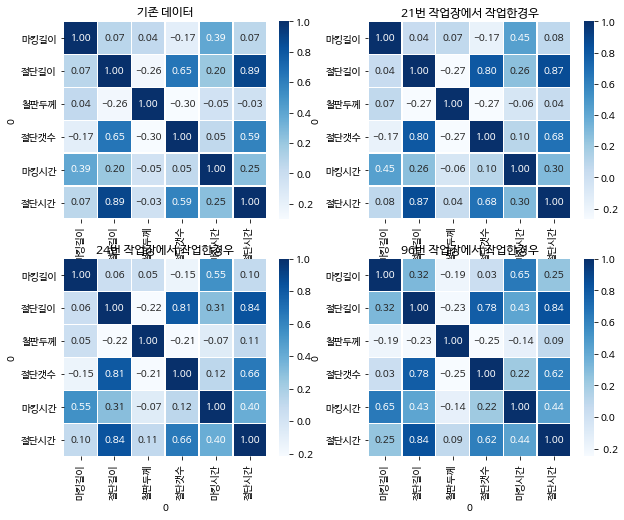

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns    
#plt.figure(figsize=(10,10))
'''sns.heatmap(data = total_data.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues',ax=ax1)'''


figure, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(10,8)


sns.heatmap(data = total_data.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues',ax=ax1)
ax1.set_title('기존 데이터')

sns.heatmap(data = data21.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues',ax=ax2)
ax2.set_title('21번 작업장에서 작업한경우')

sns.heatmap(data = data24.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues',ax=ax3)
ax3.set_title('\n24번 작업장에서 작업한경우')

sns.heatmap(data = data96.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues',ax=ax4)
ax4.set_title('\n96번 작업장에서 작업한경우')

> * 공통적으로 찾을 수 있는 점은, [절단길이-절단갯수], [마킹길이-마킹시간]의 상관성이 증가했다는 점이 였다. 

## 유전 알고리즘 
* 인체의 유전자 원리처럼 우성이 열성을 잡아먹는다는 의미로, 각 경우에서 더 나은경우를 선택하고 그렇지 않은것은 버린다는 아이디어 입니다.
* 순회 판매원 문제(TSP, Travelling Salesman Problem)이 대표적인 사례 입니다.

"도시 N 개가 있고, 도시 쌍 사이를 여행하는 비용(또는 거리)을 알고 있을 때, 도시를 각각 정확히 한 번씩 방문하고 시작점으로 돌아오는 가장 경제적인(또는 가장 짧은 경로) 방법을 찾기"

  * 저희는 마킹시간 + 절단시간 -> 작업시간 라는 새 칼럼을 만든 후 작업장 별 절단장비배열 후, 작업 N개의 최적 배열,,식으로 가야할것같은데 알고리즘을 스케줄링에 적용한 예시는 구글링으로 굉장히 찾기가 힘들었습니다.
  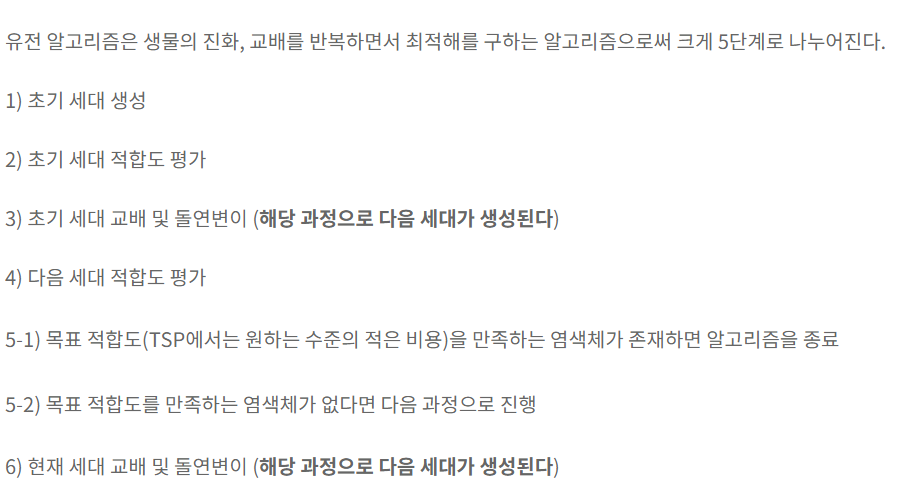

* https://slidesplayer.org/slide/16474429/
  * 유전 알고리즘 원리에 대해 잘 설명한 슬라이드 입니다
* https://www.youtube.com/watch?v=H8beAqbiWZw&t=230s
  * tsp를 파이썬으로 풀어보는 유튜브 강의 입니다. 

# 3. 모델링 적용
* model = model명()
* model.fit(X_train,y_train)
* .score로 모델별 학습정도 판단 후 선정모델에 대한 overfitting, underfitting 체크해보겠습니다
* 모델별로 정상적으로 돌아가는 지 확인이 먼저라는 말씀대로 매개변수 조절은 당장 신경쓰지는 않았습니다. 

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor


## 랜덤포레스트 

In [ ]:
'''
model = RandomForestRegressor()
model.fit(X_train1, y_train1)
model.fit(X_train2, y_train2)
'''

'\nmodel = RandomForestRegressor()\nmodel.fit(X_train1, y_train1)\nmodel.fit(X_train2, y_train2)\n'

In [ ]:
'''
train_score1 = model.score(X_train1, y_train1)
print("랜덤포레스트를 통한 마킹시간 학습정도(train data) :", train_score1)
train_score2 = model.score(X_train2, y_train2)
print("랜덤포레스트를 통한 절단시간 학습정도(train data) :", train_score2)
'''

'\ntrain_score1 = model.score(X_train1, y_train1)\nprint("랜덤포레스트를 통한 마킹시간 학습정도(train data) :", train_score1)\ntrain_score2 = model.score(X_train2, y_train2)\nprint("랜덤포레스트를 통한 절단시간 학습정도(train data) :", train_score2)\n'

In [ ]:
'''
test_score1 = model.score(X_test1, y_test1)
print("랜덤포레스트를 통한 마킹시간 학습정도(test data) :", test_score1)
test_score2 = model.score(X_test2, y_test2)
print("랜덤포레스트를 통한 절단시간 학습정도(test data) :", test_score2)
'''

'\ntest_score1 = model.score(X_test1, y_test1)\nprint("랜덤포레스트를 통한 마킹시간 학습정도(test data) :", test_score1)\ntest_score2 = model.score(X_test2, y_test2)\nprint("랜덤포레스트를 통한 절단시간 학습정도(test data) :", test_score2)\n'

* 마킹시간 예측에서 무엇이 잘못되었는지 모르겠습니다... 일단 **절단시간에 대해서만** 학습하도록 하겠습니다. 

## 에이다부스트
* 이전 모델의 과소적합 하였던 훈련 샘플에 가중치 적용
  * 그래서 전제조건이 모델의 과소적합이라고 합니다
  * XG부스트 돌리기 전에 이것도 해보았습니다. 

In [ ]:
'''from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso

model = AdaBoostRegressor(base_estimator=Lasso())

model.fit(X_train1, y_train1)
model.fit(X_train2, y_train2)

Ada_score1 = model.score(X_train1, y_train1)
print("에이다부스트를 통한 마킹시간 학습정도(train data) :", Ada_score1)
Ada_score2 = model.score(X_train2, y_train2)
print("에이다부스트를 통한 절단시간 학습정도(train data) :", Ada_score2)

Ada_test_score1 = model.score(X_test1, y_test1)
print("랜덤포레스트를 통한 마킹시간 학습정도(test data) :", Ada_test_score1)
Ada_test_score2 = model.score(X_test2, y_test2)
print("랜덤포레스트를 통한 절단시간 학습정도(test data) :", Ada_test_score2)'''


'from sklearn.ensemble import AdaBoostRegressor\nfrom sklearn.linear_model import Lasso\n\nmodel = AdaBoostRegressor(base_estimator=Lasso())\n\nmodel.fit(X_train1, y_train1)\nmodel.fit(X_train2, y_train2)\n\nAda_score1 = model.score(X_train1, y_train1)\nprint("에이다부스트를 통한 마킹시간 학습정도(train data) :", Ada_score1)\nAda_score2 = model.score(X_train2, y_train2)\nprint("에이다부스트를 통한 절단시간 학습정도(train data) :", Ada_score2)\n\nAda_test_score1 = model.score(X_test1, y_test1)\nprint("랜덤포레스트를 통한 마킹시간 학습정도(test data) :", Ada_test_score1)\nAda_test_score2 = model.score(X_test2, y_test2)\nprint("랜덤포레스트를 통한 절단시간 학습정도(test data) :", Ada_test_score2)'

>* 에이다부스트를 통한 마킹시간 학습정도(train data) : -25.263534442689966
* 에이다부스트를 통한 절단시간 학습정도(train data) : 0.8407440565396113
* 랜덤포레스트를 통한 마킹시간 학습정도(test data) : -16.05404304324564
* 랜덤포레스트를 통한 절단시간 학습정도(test data) : 0.847522017116124

## 그레디언트 부스트(XG부스트) 

> 파라미터 소개 및 상세개념
* https://wooono.tistory.com/97

In [ ]:
from xgboost import XGBRegressor
'''
model = XGBRegressor()

model.fit(X_train1, y_train1, verbose=False)
model.fit(X_train2, y_train2, verbose=False)

XG_predict1 = model.predict(X_test1)
print(f"마킹시간rmse : {np.sqrt(mean_squared_error(y_test1, XG_predict1))}")
XG_predict2 = model.predict(X_test2)
print(f"절단시간rmse : {np.sqrt(mean_squared_error(y_test2, XG_predict2))}")

-> 마킹:453, 절단:2171 나왔음
'''

'\nmodel = XGBRegressor()\n\nmodel.fit(X_train1, y_train1, verbose=False)\nmodel.fit(X_train2, y_train2, verbose=False)\n\nXG_predict1 = model.predict(X_test1)\nprint(f"마킹시간rmse : {np.sqrt(mean_squared_error(y_test1, XG_predict1))}")\nXG_predict2 = model.predict(X_test2)\nprint(f"절단시간rmse : {np.sqrt(mean_squared_error(y_test2, XG_predict2))}")\n\n-> 마킹:453, 절단:2171 나왔음\n'

In [ ]:
import xgboost as xgb

# 모델 선언
model = xgb.XGBRegressor(learning_rate=0.1,max_depth=5,n_estimators=100,booster='dart')

# 모델 훈련
model.fit(X_train2, y_train2, verbose=False)



[03:14:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
'''
XG_predict1 = my_model.predict(X_test1) 
print(f"마킹시간rmse : {np.sqrt(mean_squared_error(y_test1, XG_predict1))}")
'''
XG_pred = model.predict(X_test2) 
print(f"절단시간rmse : {np.sqrt(mean_squared_error(y_test2, XG_pred))}")

절단시간rmse : 488.57847955752214


> * 절단시간rmse가 2171->488로 감소하였습니다. 

### XGboost feature importance 

In [ ]:
## using graphviz 
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot
## 아래 있는것은 필수는 아닌데, 가끔 에러가 생길 때가 있어서, 그냥 같이 해줌. 
!apt-get install graphviz libgraphviz-dev pkg-config
!pip install pygraphviz
import pygraphviz

In [ ]:
  import xgboost as xgb

  xgb.plot_importance(model)

> * 절단길이, 철판두께, 마킹시간 순으로 크게 영향을 주었습니다. 
* 절단장비왕 철판재질은 영향은 준 정도가 미비하였습니다. 

In [ ]:
  import xgboost as xgb
  import matplotlib.pyplot as plt

  # num_trees : 그림을 여러개 그릴시 그림 번호
  # rankdir : 트리의 방향, 디폴트는 위아래 방향
  # rankdir="LR" : 왼쪽에서 오른쪽 방향으로 트리를 보여준다.
  xgb.plot_tree(model, num_trees=0, rankdir='LR')

  fig = plt.gcf()
  fig.set_size_inches(150, 100)

  plt.show()

## light GBM 

In [ ]:
from lightgbm.sklearn import LGBMRegressor
import lightgbm as lgb

#train_ds = lgb.Dataset(X_train1, label = y_train1) 
#test_ds = lgb.Dataset(X_test1, label = y_test1) 
train_ds2 = lgb.Dataset(X_train2, label = y_train2) 
test_ds2 = lgb.Dataset(X_test2, label = y_test2) 


params = {'learning_rate': 0.1, 
          'max_depth': -1, 
          'boosting': 'dart', 
          'objective': 'regression', 
          'metric': 'mse', 
          'is_training_metric': True, 
          'num_leaves': 144, 
          'feature_fraction': 0.9, 
          'bagging_fraction': 0.7, 
          'bagging_freq': 5, 
          'seed':2018}

#model1 = lgb.train(params, train_ds, 1000, test_ds, verbose_eval=100, early_stopping_rounds=100)
model2 = lgb.train(params, train_ds2, 1000, test_ds2, verbose_eval=100, early_stopping_rounds=100)
#최초 파라미터 로는, 절단시간 경우 rmse : 1830 나왔었음

/usr/local/lib/python3.6/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid_0's l2: 242215
[200]	valid_0's l2: 244539
[300]	valid_0's l2: 246227
[400]	valid_0's l2: 236517
[500]	valid_0's l2: 233038
[600]	valid_0's l2: 234527
[700]	valid_0's l2: 234323
[800]	valid_0's l2: 234032
[900]	valid_0's l2: 233784
[1000]	valid_0's l2: 235494


In [ ]:
'''
GBM_predict1 = model1.predict(X_test1)
print(f"마킹시간rmse : {np.sqrt(mean_squared_error(y_test1, GBM_predict1))}")
'''
GBM_predict2 = model2.predict(X_test2)
print(f"절단시간rmse : {np.sqrt(mean_squared_error(y_test2, GBM_predict2))}")

절단시간rmse : 485.27677065014893


> * 절단시간rmse : 1830 -> 485 
* 위의 xg부스트의 경우는 488

## xgboost, lightGBM을 Grid Search로 최적의 경우를 탐색해보자 
* 파라미터 조절해가며 설정
* http://machinelearningkorea.com/2019/09/29/lightgbm-%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0/
* https://wooono.tistory.com/97
* **그리드 서치 이용!**
  * 구글에 "그리드서치" "회귀" 검색
  * https://cyan91.tistory.com/18
  * https://m.blog.naver.com/PostView.nhn?blogId=gustn3964&logNo=221431933811&proxyReferer=https:%2F%2Fwww.google.com%2F

* **산하형꺼참고 버스**

### XGBoost 

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
import xgboost as xgb

model=xgb.XGBRegressor()

param_grid={'booster' :['gbtree','dart'],
                 'learning_rate' : [0.01,0.05,0.2],
	    'nrounds' : [1000,1500,2000],
	    'gamma' : [0,10,20],	
	    'max_depth' : [7,8,9,-1]}

	   
gcv=GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

gcv.fit(X_train2, y_train2)
print('final params', gcv.best_params_)  
print('best score', gcv.best_score_) #막상 reg:squarederror를 사용하니까 값이 범위를 초과한다면서 아예 돌아가지가 않았다

[09:53:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:54:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:55:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:55:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:56:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:57:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:58:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:59:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: value -1 for Parameter max_depth should be greater equal to 0

  FitFailedWarning)


[10:39:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:39:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:39:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:39:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:39:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:39:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:39:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:39:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: value -1 for Parameter max_depth should be greater equal to 0

  FitFailedWarning)


[11:25:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:25:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:25:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:25:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:25:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:25:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:25:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:25:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: value -1 for Parameter max_depth should be greater equal to 0

  FitFailedWarning)


[12:09:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:09:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:09:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:09:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:09:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:09:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:09:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:09:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: value -1 for Parameter max_depth should be greater equal to 0

  FitFailedWarning)


[12:55:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:55:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:55:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:55:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:55:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:55:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:55:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:55:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

KeyboardInterrupt: ignored